# **Spark Background**

## 1. Spark Architecture
Apache Spark is an open-source distributed computing framework used for large-scale data processing written in Java. This framework allows computations to be spread out across different nodes, where each node tends to be its own physical or virtual machine running one or multiple JVMs. 

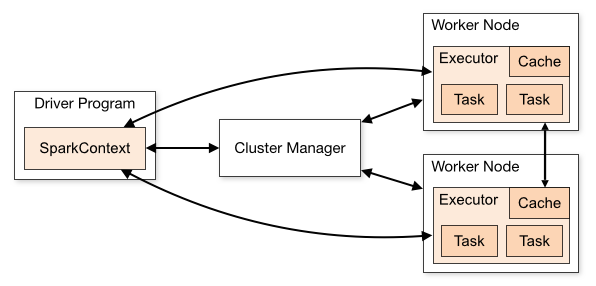

### 1.1 *Driver Node*
The driver node is the machine where the main process (`Spark Session`) runs, and where API endpoints are directed. This tends to run on its own JVM.
* Step 1: convert user program into tasks
* Step 2: Schedules the tasks on the executors using the Cluster Manager

### 1.2 *Cluster Manager Node*
The cluster manager is the machine that manages the resources distributed across the different worker nodes. This tends to run on onre or multiple JVMs.


### 1.3 *Worker Node*
The worker node is the machine that performs all of the computations in the data processing. 


### 1.4 *Executor*
An executor is a JVM in charge of running individual tasks. They are launched at the beginning of the spark application, and typically stay alive the entire time. They can store data in memory (or on disk) during the data processing pipeline. 

### 1.5 *Tasks*
A task is the smalles unit of work received from the Driver Node by the the executor JVM. A RDD/dataframe can be partitioned into multiple partitions, each task is tied to a single data partition. Multiple tasks can be executed in parallel, even within the same executor JVM. 

For example if a dataframe is divided into 2 partitions, and the user asks for the sum of column "price", then the driver will order 2 tasks (one for each partition). Each task will sum the values in the "price" column, the driver then collects the results from both tasks and combines them into the final result. The results from a task are sent directly to the driver node, the cluster manager only allocates resources, it does not server as a proxy between the driver and the worker nodes. 


## 2. Transformations

As stated before data in spark is split into different paritions in order to allow data transformations to occur in parallel. There are two types of transformations: 
* Narrow - each partition outputs to a single partition
* Wide - input partitions provide output for multiple partitions (a.k.a. Shuffle)


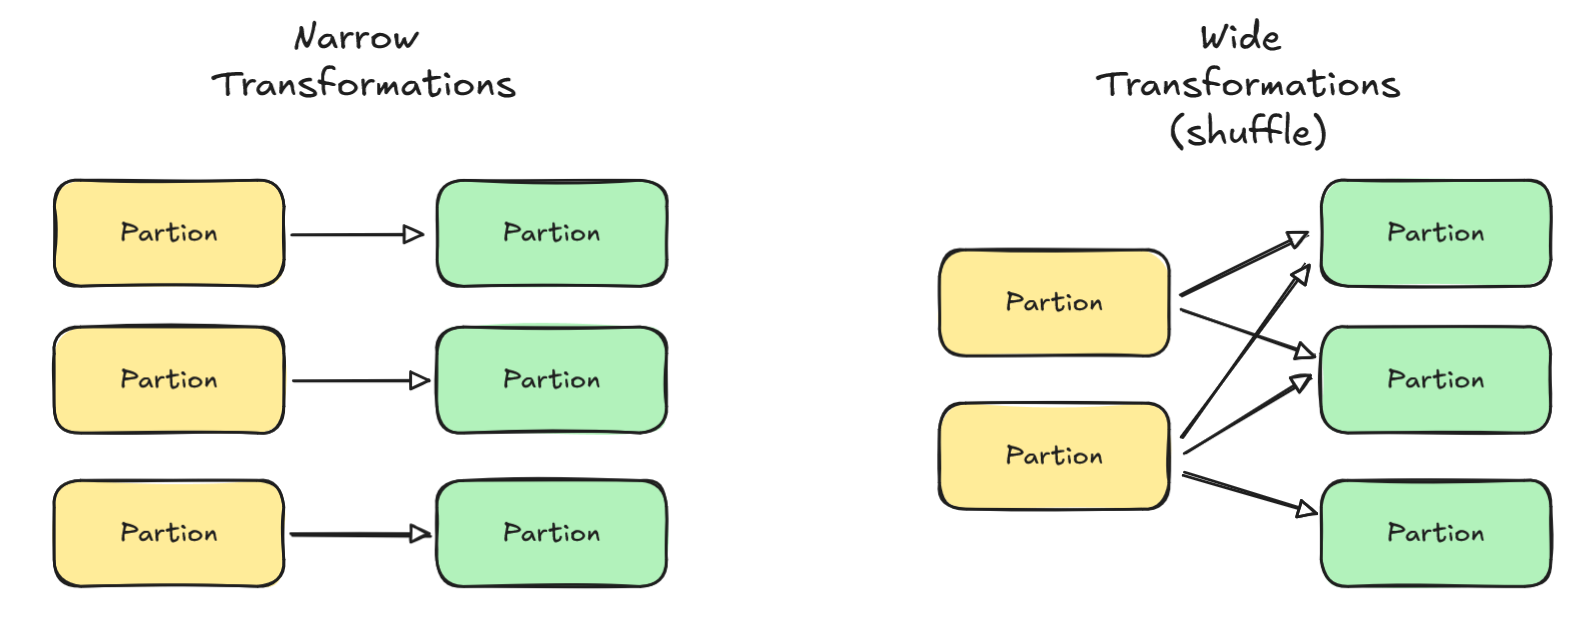



## 3. Logical/Physical Plans

When writing Spark code, the user defines a set of transformations they would like applied to their data in the form of a SQL Query or DataFrame object, from which a ***Logical Execution Plan*** is constructed. 
1) **Transformations** - User writes transformations as code (SQL Query or DataFrame object) 
2) **Unresolved Logical Plan** - Spark creates an plan from the user defined transformations (checks syntax)
3) **Resolved Logical Plan** - The data catalog (containing schema information such as data types, column names, etc.) is used to check the validity of the proposed transformations. 
4) **Optimized Logical Plan** - The optimal order of transformations is determined (e.g. filter first, then aggregate)

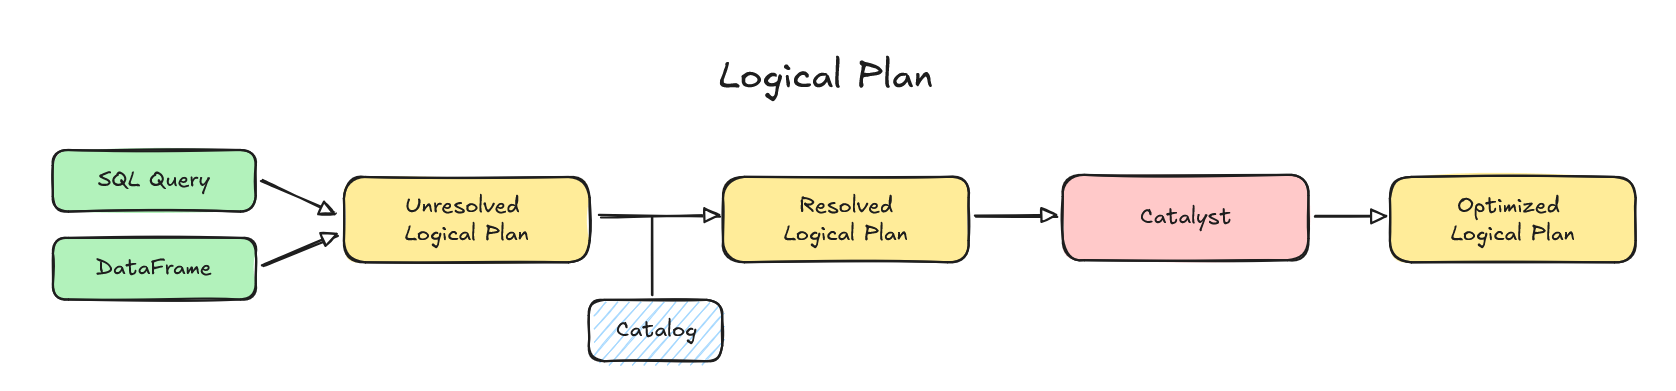

The logical plan mainly defines what transformations need to be done in broad strokes. How these transformations should be done, i.e. which nodes should be used to perform which tasks on which partitions, is created in the ***Physical Execution Plan***. 
1) **Physical Plans** - The optimized logical plan is used to generate various possible physical plans
2) **Optimal Physical Plan** - A cost model is used to evaluate which physical plan is the most efficient based on various statistics (metadata) of the affected partitions. 
3) **RDD** - An object containing the transformation output (e.g. DataFrame) is returned

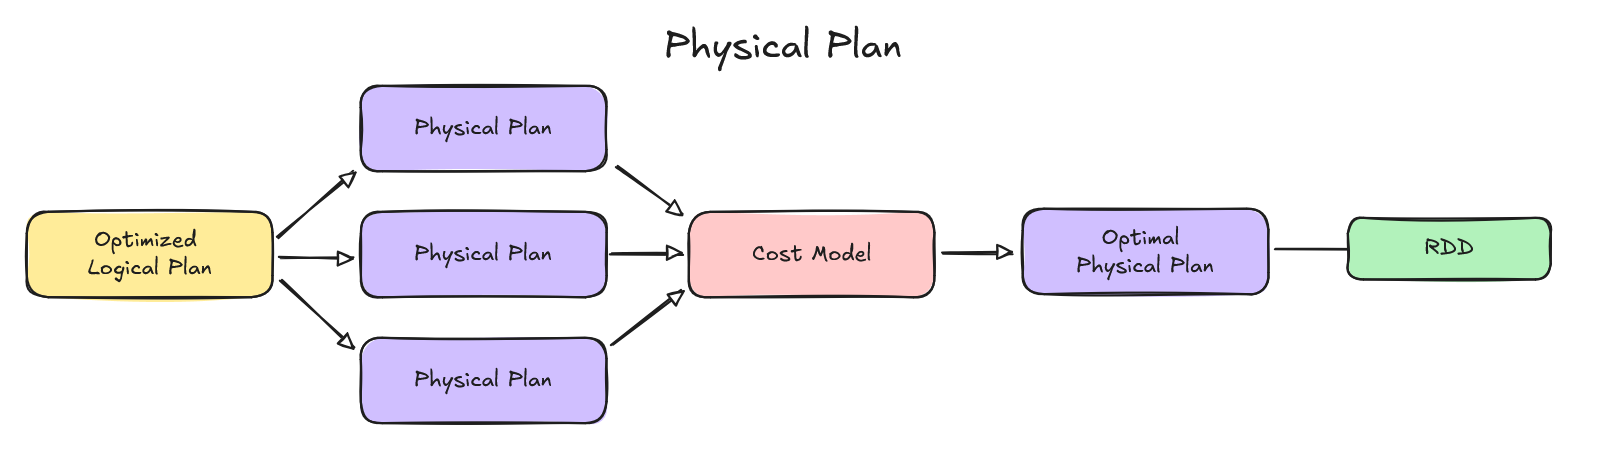

